***Preprocessing***

**1.) Importing the libraries**

In [1]:
import pandas as pd 
import numpy as np 


**2.) Loading the dataset**

In [2]:
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\ACM\Projects\AiPulseX Projects\Project-1 (movie review classifier with gui)\IMDB Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**3.) Encoding the sentiment label**

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [5]:
data["sentiment"]=encoder.fit_transform(data["sentiment"])

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**4.) Checking how the sentiment is distributed**

In [7]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

<hr>

***Creating a pipeline for vectorising and model prediction***

**1.) Importing the necessary modules**

In [8]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

**2.) Creating the pipeline**

Pipeline: 

In [9]:
clf= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('random_forest', RandomForestClassifier(n_estimators=5, criterion='entropy'))
])

**Reasons for selecting those parameters** 

->

<hr>

***Fitting the model and training it***

**1.) Importing the necessary modules and splitting the data**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(data["review"],data["sentiment"],test_size=0.25,random_state=42)

**2.) Training the model**

In [12]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=5))])

<hr>

***Model Evaluation***

**1.) Importing the necessary modules**

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,confusion_matrix 

**2.) Getting the predictions**

In [14]:
y_pred=clf.predict(X_test)

**3.) Evaluating the model**

In [15]:
a_score=accuracy_score(y_test,y_pred)
p_score=precision_score(y_test,y_pred)
r_score=recall_score(y_test,y_pred)
f_score=f1_score(y_test,y_pred)

In [16]:
# Printing them 
print(f"The accuracy score is: {a_score}")
print(f"The precision score is: {p_score}")
print(f"The recall score is: {r_score}")
print(f"The f1 score is: {f_score}")

The accuracy score is: 0.72064
The precision score is: 0.725090794252329
The recall score is: 0.7239476588365127
The f1 score is: 0.7245187756390028


In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

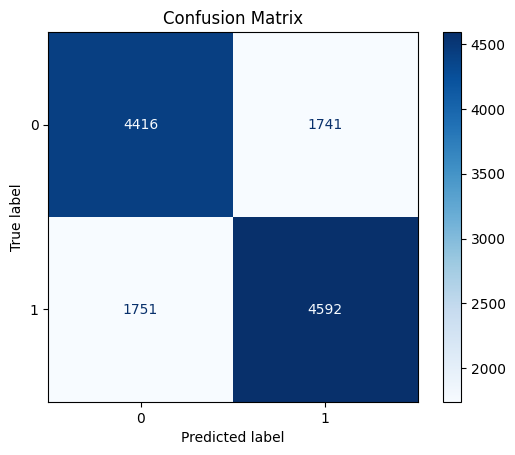

In [18]:
# printing the confusion matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**4.) Visualising the scores for better understanding**

<Figure size 1000x600 with 0 Axes>

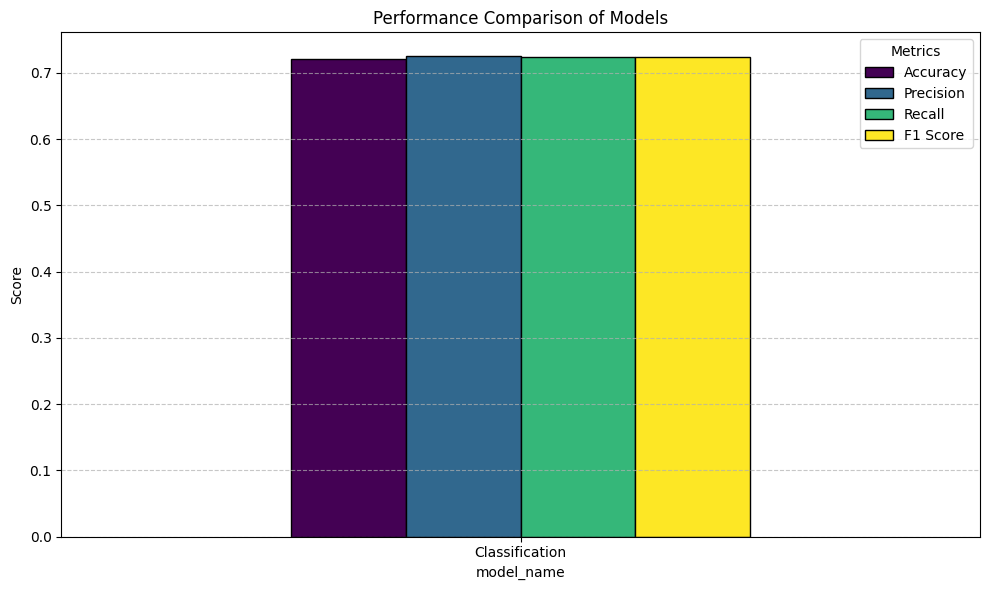

In [19]:
model={"model_name":"Classification","Accuracy":a_score,"Precision": p_score,"Recall": r_score,"F1 Score": f_score} 
performance=[]
performance.append(model)
perf=pd.DataFrame(performance)
plt.figure(figsize=(10, 6))
perf.set_index("model_name").plot(kind="bar", figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<hr>
<hr>


***Making the user interface using tkinter to improve user experience*** 

**1.) Importing the required modules**

In [20]:
import tkinter as tk 
from tkinter import messagebox

tkinter: 

**2.) Creating the main gui window**

In [21]:
root = tk.Tk()
root.title("Review Classifier")

''

**3.) Creating the gui elements**

In [22]:
label = tk.Label(root, text="Enter movie review:")
label.pack(pady=10)

In [23]:
entry = tk.Entry(root, width=50)
entry.pack(pady=10)

In [24]:
result_label = tk.Label(root, text="")
result_label.pack(pady=10)

**Explanation for all the elements** 

->

**4.) Creating a function to process the user input and predict the sentiment**

In [25]:
def process():
    user_input = entry.get()
    if user_input:
        prediction = clf.predict([user_input])[0]
        sentiment = "Positive" if prediction == 1 else "Negative"
        color = "green" if sentiment == "Positive" else "red"
        result_label.config(text=f"Prediction: {sentiment}", fg=color)
    else:
        messagebox.showwarning("Input Error", "Please enter a review text")

**5.) Creatin a prediction button**

In [26]:
button = tk.Button(root, text="Predict", command=process)
button.pack(pady=10)

**6.)Running the final applicatino**

In [27]:
root.mainloop()